In [10]:
import mediapipe as mp
import cv2
import sys
import math
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation
from mediapipe.python import solutions
from pandas import Series
import glob
from tqdm import tqdm

mp_drawing = solutions.drawing_utils
mp_holistic = solutions.holistic

def skel(file):

    #불러올 파일명
    cap = cv2.VideoCapture(file)
    #결과물을 집어넣을 폴더 생성
    # try:
    #     os.makedirs("FinalProject/CoordinateValues/%s" %file)
    #     os.makedirs("FinalProject/Result/%s" %file)
    # except:
    #     pass

    # #불러올 파일의 path설정
    # if file.split('_')[0] == 'half':
    #     cap = cv2.VideoCapture('FinalProject/half/%s.mp4' % file)
    # else:
    #     cap = cv2.VideoCapture('FinalProject/full/%s.mp4' % file)

    ### 엉덩이, 어깨, 무릎, 발목 좌표 집어넣을 리스트 생성
    
    R_WRIST = []    
    L_WRIST = []
    R_ELBOW = []
    L_ELBOW = []
    R_HIP = []
    L_HIP = []
    R_SHOULDER = []
    L_SHOULDER = []
    R_KNEE = []
    L_KNEE = []
    R_ANKLE = []
    L_ANKLE = []
    R_HEEL = []
    L_HEEL = []
    R_FOOT = []
    L_FOOT = []

    #영상 불러와서 실행
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

        #영상이 실행중이거나 웹캠이 실행 중일 때
        while cap.isOpened():
            ret, frame = cap.read()
            if ret == False:
                break
            height, width, _ = frame.shape #frame의 세로, 가로를 각 변수에 입력
            w_h = width/height #실제 각도 측정할 때 필요
#             print(w_h)

            try:
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            except:
                break
            #각 리스트에 생성된 좌표 값 입력
            results = holistic.process(image)
            R_WRIST.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_WRIST])
            L_WRIST.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_WRIST])
            R_ELBOW.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_ELBOW])
            L_ELBOW.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_ELBOW])
            R_HIP.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_HIP])
            L_HIP.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_HIP])
            R_SHOULDER.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_SHOULDER])
            L_SHOULDER.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_SHOULDER])
            R_KNEE.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_KNEE])
            L_KNEE.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_KNEE])
            R_ANKLE.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_ANKLE])
            L_ANKLE.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_ANKLE])
            R_HEEL.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_HEEL])
            L_HEEL.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_HEEL])
            R_FOOT.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_FOOT_INDEX])
            L_FOOT.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_FOOT_INDEX])
            
            squat_pose = []
            squat_pose_x = []
            squat_pose_y = []
            squat_pose_z = []
            
            for i in range(11, 17):
                squat_pose.append(results.pose_landmarks.landmark[i])

            for i in range(23, 33):
                squat_pose.append(results.pose_landmarks.landmark[i])

            for i in range(16):
                squat_pose_x.append(squat_pose[i].x)
                squat_pose_y.append(squat_pose[i].y)
                squat_pose_z.append(squat_pose[i].z)

            squat = pd.DataFrame({'x':squat_pose_x, 'y':squat_pose_y, 'z':squat_pose_z}, 
                         index=['R_SHOULDER', 'L_SHOULDER',
                                'R_ELBOW', 'L_ELBOW',
                                'R_WRIST', 'L_WRIST',
                                'R_HIP', 'L_HIP',
                                'R_KNEE', 'L_KNEE',
                                'R_ANKLE', 'L_ANKLE',
                                'R_HEEL', 'L_HEEL',
                                'R_FOOT', 'L_FOOT']).T
            print(squat)
            
            R_ARM_x_line = np.linspace(squat['R_SHOULDER']['x'], squat['R_ELBOW']['x'], 1000)
            R_ARM_y_line = np.linspace(squat['R_SHOULDER']['y'], squat['R_ELBOW']['y'], 1000)
            R_ARM_z_line = np.linspace(squat['R_SHOULDER']['z'], squat['R_ELBOW']['z'], 1000)
            
            R_ARM_2_x_line = np.linspace(squat['R_WRIST']['x'], squat['R_ELBOW']['x'], 1000)
            R_ARM_2_y_line = np.linspace(squat['R_WRIST']['y'], squat['R_ELBOW']['y'], 1000)
            R_ARM_2_z_line = np.linspace(squat['R_WRIST']['z'], squat['R_ELBOW']['z'], 1000)
            
            L_ARM_x_line = np.linspace(squat['L_SHOULDER']['x'], squat['L_ELBOW']['x'], 1000)
            L_ARM_y_line = np.linspace(squat['L_SHOULDER']['y'], squat['L_ELBOW']['y'], 1000)
            L_ARM_z_line = np.linspace(squat['L_SHOULDER']['z'], squat['L_ELBOW']['z'], 1000)
            
            L_ARM_2_x_line = np.linspace(squat['L_WRIST']['x'], squat['L_ELBOW']['x'], 1000)
            L_ARM_2_y_line = np.linspace(squat['L_WRIST']['y'], squat['L_ELBOW']['y'], 1000)
            L_ARM_2_z_line = np.linspace(squat['L_WRIST']['z'], squat['L_ELBOW']['z'], 1000)
            
            SHOULDER_x_line = np.linspace(squat['L_SHOULDER']['x'], squat['R_SHOULDER']['x'], 1000)
            SHOULDER_y_line = np.linspace(squat['L_SHOULDER']['y'], squat['R_SHOULDER']['y'], 1000)
            SHOULDER_z_line = np.linspace(squat['L_SHOULDER']['z'], squat['R_SHOULDER']['z'], 1000)

            HIP_x_line = np.linspace(squat['L_HIP']['x'], squat['R_HIP']['x'], 1000)
            HIP_y_line = np.linspace(squat['L_HIP']['y'], squat['R_HIP']['y'], 1000)
            HIP_z_line = np.linspace(squat['L_HIP']['z'], squat['R_HIP']['z'], 1000)

            L_TOP_x_line = np.linspace(squat['L_SHOULDER']['x'], squat['L_HIP']['x'], 1000)
            L_TOP_y_line = np.linspace(squat['L_SHOULDER']['y'], squat['L_HIP']['y'], 1000)
            L_TOP_z_line = np.linspace(squat['L_SHOULDER']['z'], squat['L_HIP']['z'], 1000)

            R_TOP_x_line = np.linspace(squat['R_SHOULDER']['x'], squat['R_HIP']['x'], 1000)
            R_TOP_y_line = np.linspace(squat['R_SHOULDER']['y'], squat['R_HIP']['y'], 1000)
            R_TOP_z_line = np.linspace(squat['R_SHOULDER']['z'], squat['R_HIP']['z'], 1000)

            L_MIDDLE_1_x_line = np.linspace(squat['L_HIP']['x'], squat['L_KNEE']['x'], 1000)
            L_MIDDLE_1_y_line = np.linspace(squat['L_HIP']['y'], squat['L_KNEE']['y'], 1000)
            L_MIDDLE_1_z_line = np.linspace(squat['L_HIP']['z'], squat['L_KNEE']['z'], 1000)

            R_MIDDLE_1_x_line = np.linspace(squat['R_HIP']['x'], squat['R_KNEE']['x'], 1000)
            R_MIDDLE_1_y_line = np.linspace(squat['R_HIP']['y'], squat['R_KNEE']['y'], 1000)
            R_MIDDLE_1_z_line = np.linspace(squat['R_HIP']['z'], squat['R_KNEE']['z'], 1000)

            L_MIDDLE_2_x_line = np.linspace(squat['L_KNEE']['x'], squat['L_ANKLE']['x'], 1000)
            L_MIDDLE_2_y_line = np.linspace(squat['L_KNEE']['y'], squat['L_ANKLE']['y'], 1000)
            L_MIDDLE_2_z_line = np.linspace(squat['L_KNEE']['z'], squat['L_ANKLE']['z'], 1000)

            R_MIDDLE_2_x_line = np.linspace(squat['R_KNEE']['x'], squat['R_ANKLE']['x'], 1000)
            R_MIDDLE_2_y_line = np.linspace(squat['R_KNEE']['y'], squat['R_ANKLE']['y'], 1000)
            R_MIDDLE_2_z_line = np.linspace(squat['R_KNEE']['z'], squat['R_ANKLE']['z'], 1000)

            L_BOTTOM_x_line = np.linspace(squat['L_HEEL']['x'], squat['L_FOOT']['x'], 1000)
            L_BOTTOM_y_line = np.linspace(squat['L_HEEL']['y'], squat['L_FOOT']['y'], 1000)
            L_BOTTOM_z_line = np.linspace(squat['L_HEEL']['z'], squat['L_FOOT']['z'], 1000)

            R_BOTTOM_x_line = np.linspace(squat['R_HEEL']['x'], squat['R_FOOT']['x'], 1000)
            R_BOTTOM_y_line = np.linspace(squat['R_HEEL']['y'], squat['R_FOOT']['y'], 1000)
            R_BOTTOM_z_line = np.linspace(squat['R_HEEL']['z'], squat['R_FOOT']['z'], 1000)
            
            L_BOTTOM_2_x_line = np.linspace(squat['L_FOOT']['x'], squat['L_ANKLE']['x'], 1000)
            L_BOTTOM_2_y_line = np.linspace(squat['L_FOOT']['y'], squat['L_ANKLE']['y'], 1000)
            L_BOTTOM_2_z_line = np.linspace(squat['L_FOOT']['z'], squat['L_ANKLE']['z'], 1000)

            R_BOTTOM_2_x_line = np.linspace(squat['R_FOOT']['x'], squat['R_ANKLE']['x'], 1000)
            R_BOTTOM_2_y_line = np.linspace(squat['R_FOOT']['y'], squat['R_ANKLE']['y'], 1000)
            R_BOTTOM_2_z_line = np.linspace(squat['R_FOOT']['z'], squat['R_ANKLE']['z'], 1000)
            
            x_max = max(squat.T.x)
            x_min = min(squat.T.x)
            x = (x_max + x_min)/3

            y_max = max(squat.T.y)
            y_min = min(squat.T.y)
            y = (y_max + y_min) /10

            z_max = max(squat.T.z)
            z_min = min(squat.T.z)
            z = (z_max - z_min)

            fig = plt.figure()
            #create data for 3d line
            #3d container
            ax = plt.axes(projection = '3d')


            plt.ylim(0, 1)
            ax.set_zlim(0, 1*w_h)#실제 각도 측정할 때 필요
#             plt.xlim(x_min, x_max)

            ax.plot3D(R_ARM_z_line, R_ARM_x_line, R_ARM_y_line, linewidth=3.0)
            ax.plot3D(L_ARM_z_line, L_ARM_x_line, L_ARM_y_line, linewidth=3.0)
            ax.plot3D(R_ARM_2_z_line, R_ARM_2_x_line, R_ARM_2_y_line, linewidth=3.0)
            ax.plot3D(L_ARM_2_z_line, L_ARM_2_x_line, L_ARM_2_y_line, linewidth=3.0)
            ax.plot3D(SHOULDER_z_line, SHOULDER_x_line, SHOULDER_y_line, linewidth=3.0)
            ax.plot3D(HIP_z_line, HIP_x_line, HIP_y_line, linewidth=3.0)
            ax.plot3D(L_TOP_z_line, L_TOP_x_line, L_TOP_y_line, linewidth=3.0)
            ax.plot3D(R_TOP_z_line, R_TOP_x_line, R_TOP_y_line, linewidth=3.0)
            ax.plot3D(L_MIDDLE_1_z_line, L_MIDDLE_1_x_line, L_MIDDLE_1_y_line, linewidth=3.0)
            ax.plot3D(R_MIDDLE_1_z_line, R_MIDDLE_1_x_line, R_MIDDLE_1_y_line, linewidth=3.0)
            ax.plot3D(L_MIDDLE_2_z_line, L_MIDDLE_2_x_line, L_MIDDLE_2_y_line, linewidth=3.0)
            ax.plot3D(R_MIDDLE_2_z_line, R_MIDDLE_2_x_line, R_MIDDLE_2_y_line, linewidth=3.0)
            #ax.plot3D(L_BOTTOM_z_line, L_BOTTOM_x_line, L_BOTTOM_y_line, linewidth=5.0)
            #ax.plot3D(R_BOTTOM_z_line, R_BOTTOM_x_line, R_BOTTOM_y_line, linewidth=5.0)
            #ax.plot3D(L_BOTTOM_2_z_line, L_BOTTOM_2_x_line, L_BOTTOM_2_y_line, linewidth=5.0)
            #ax.plot3D(R_BOTTOM_2_z_line, R_BOTTOM_2_x_line, R_BOTTOM_2_y_line, linewidth=5.0)
            ax.grid(False)
            ax.set_axis_off()

            ax.view_init(elev=180, azim=0)
            plt.savefig('%s.jpg'%file.split('/')[-1].split('\\')[-1].split('.')[0])
#             plt.close()

            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # 이미지 위에 좌표값 출력 파트
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(245,117,66), thickness=4, circle_radius=2),
                                     mp_drawing.DrawingSpec(color=(245,66,230), thickness=4, circle_radius=2))
#             #스켈레톤화 된 영상 출력                
            cv2.imshow('Raw Webcam Feed', image)
            cv2.imwrite('%s_sub.jpg'%file.split('/')[-1].split('.')[0], image)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

 
    cap.release()
    cv2.destroyAllWindows()

skel('images.jpg')

In [11]:
skel('images.jpg')

In [27]:
import mediapipe as mp
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import glob
from math import acos, degrees
from PIL import Image
import os
from tensorflow.keras.layers import LeakyReLU

def rotate(file):
    img = Image.open(file)
    img_orient = img._getexif()
    try:
        if img_orient[274] == 6:
            img = img.rotate(-90)
            img.save(file)
    except:
        pass

def form_check(file):
    rotate(file)
    
    if file.split('.')[-1]!='jpg':
        image = Image.open(file).convert('RGB')
        image.save('%s.jpg'%file.split('.')[0], 'jpeg')
        os.remove(file)
        file = file.split('.')[0] +'.jpg'
        
    mp_drawing = mp.solutions.drawing_utils
    mp_holistic = mp.solutions.holistic

    model = load_model('D:/pose_3_model(CNN_AI).h5', custom_objects={'LeakyReLU':LeakyReLU})
    
    cap = cv2.VideoCapture(file)
       
    feedback_num = 0
    result_dict = ''
    
    R_WRIST = []    
    L_WRIST = []
    R_ELBOW = []
    L_ELBOW = []
    R_HIP = []
    L_HIP = []
    R_SHOULDER = []
    L_SHOULDER = []
    R_KNEE = []
    L_KNEE = []
    R_ANKLE = []
    L_ANKLE = []
    R_HEEL = []
    L_HEEL = []
    R_FOOT = []
    L_FOOT = []
    
    #영상 불러와서 실행
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

        #영상이 실행중이거나 웹캠이 실행 중일 때
        while cap.isOpened():
            ret, frame = cap.read()
            if ret == False:
                break
            height, width, _ = frame.shape #frame의 세로, 가로를 각 변수에 입력
            w_h = width/height #실제 각도 측정할 때 필요
            try:
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            except:
                break
            #각 리스트에 생성된 좌표 값 입력

            results = holistic.process(image)
            R_WRIST.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_WRIST])
            L_WRIST.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_WRIST])
            R_ELBOW.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_ELBOW])
            L_ELBOW.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_ELBOW])
            R_HIP.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_HIP])
            L_HIP.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_HIP])
            R_SHOULDER.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_SHOULDER])
            L_SHOULDER.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_SHOULDER])
            R_KNEE.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_KNEE])
            L_KNEE.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_KNEE])
            R_ANKLE.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_ANKLE])
            L_ANKLE.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_ANKLE])
            R_HEEL.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_HEEL])
            L_HEEL.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_HEEL])
            R_FOOT.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_FOOT_INDEX])
            L_FOOT.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_FOOT_INDEX])
            
            print('R_WRIST : \n', R_WRIST)
            print('L_WRIST : \n', L_WRIST)
            print('R_ELBOW : \n', R_ELBOW)
            print('L_ELBOW : \n', L_ELBOW)
            print('R_HIP : \n', R_HIP)
            print('L_HIP : \n', L_HIP)
            print('R_SHOULDER : \n', R_SHOULDER)
            print('L_SHOULDER : \n', L_SHOULDER)
            print('R_KNEE : \n', R_KNEE)
            print('L_KNEE : \n', L_KNEE)
            print('R_ANKLE : \n', R_ANKLE)
            print('L_ANKLE : \n', L_ANKLE)
            print('R_HEEL : \n', R_HEEL)
            print('L_HEEL : \n', L_HEEL)
            print('R_FOOT : \n', R_FOOT)
            print('L_FOOT : \n', L_FOOT)
            
            squat_pose = []
            squat_pose_x = []
            squat_pose_y = []
            squat_pose_z = []
            
            for i in range(11, 17):
                squat_pose.append(results.pose_landmarks.landmark[i])

            for i in range(23, 33):
                squat_pose.append(results.pose_landmarks.landmark[i])

            for i in range(16):
                squat_pose_x.append(squat_pose[i].x)
                squat_pose_y.append(squat_pose[i].y)
                squat_pose_z.append(squat_pose[i].z)

            squat = pd.DataFrame({'x':squat_pose_x, 'y':squat_pose_y, 'z':squat_pose_z}, 
                         index=['R_SHOULDER', 'L_SHOULDER',
                                'R_ELBOW', 'L_ELBOW',
                                'R_WRIST', 'L_WRIST',
                                'R_HIP', 'L_HIP',
                                'R_KNEE', 'L_KNEE',
                                'R_ANKLE', 'L_ANKLE',
                                'R_HEEL', 'L_HEEL',
                                'R_FOOT', 'L_FOOT']).T
            
            R_ARM_x_line = np.linspace(squat['R_SHOULDER']['x'], squat['R_ELBOW']['x'], 1000)
            R_ARM_y_line = np.linspace(squat['R_SHOULDER']['y'], squat['R_ELBOW']['y'], 1000)
            R_ARM_z_line = np.linspace(squat['R_SHOULDER']['z'], squat['R_ELBOW']['z'], 1000)
            
            R_ARM_2_x_line = np.linspace(squat['R_WRIST']['x'], squat['R_ELBOW']['x'], 1000)
            R_ARM_2_y_line = np.linspace(squat['R_WRIST']['y'], squat['R_ELBOW']['y'], 1000)
            R_ARM_2_z_line = np.linspace(squat['R_WRIST']['z'], squat['R_ELBOW']['z'], 1000)
            
            L_ARM_x_line = np.linspace(squat['L_SHOULDER']['x'], squat['L_ELBOW']['x'], 1000)
            L_ARM_y_line = np.linspace(squat['L_SHOULDER']['y'], squat['L_ELBOW']['y'], 1000)
            L_ARM_z_line = np.linspace(squat['L_SHOULDER']['z'], squat['L_ELBOW']['z'], 1000)
            
            L_ARM_2_x_line = np.linspace(squat['L_WRIST']['x'], squat['L_ELBOW']['x'], 1000)
            L_ARM_2_y_line = np.linspace(squat['L_WRIST']['y'], squat['L_ELBOW']['y'], 1000)
            L_ARM_2_z_line = np.linspace(squat['L_WRIST']['z'], squat['L_ELBOW']['z'], 1000)
            
            SHOULDER_x_line = np.linspace(squat['L_SHOULDER']['x'], squat['R_SHOULDER']['x'], 1000)
            SHOULDER_y_line = np.linspace(squat['L_SHOULDER']['y'], squat['R_SHOULDER']['y'], 1000)
            SHOULDER_z_line = np.linspace(squat['L_SHOULDER']['z'], squat['R_SHOULDER']['z'], 1000)

            HIP_x_line = np.linspace(squat['L_HIP']['x'], squat['R_HIP']['x'], 1000)
            HIP_y_line = np.linspace(squat['L_HIP']['y'], squat['R_HIP']['y'], 1000)
            HIP_z_line = np.linspace(squat['L_HIP']['z'], squat['R_HIP']['z'], 1000)

            L_TOP_x_line = np.linspace(squat['L_SHOULDER']['x'], squat['L_HIP']['x'], 1000)
            L_TOP_y_line = np.linspace(squat['L_SHOULDER']['y'], squat['L_HIP']['y'], 1000)
            L_TOP_z_line = np.linspace(squat['L_SHOULDER']['z'], squat['L_HIP']['z'], 1000)

            R_TOP_x_line = np.linspace(squat['R_SHOULDER']['x'], squat['R_HIP']['x'], 1000)
            R_TOP_y_line = np.linspace(squat['R_SHOULDER']['y'], squat['R_HIP']['y'], 1000)
            R_TOP_z_line = np.linspace(squat['R_SHOULDER']['z'], squat['R_HIP']['z'], 1000)

            L_MIDDLE_1_x_line = np.linspace(squat['L_HIP']['x'], squat['L_KNEE']['x'], 1000)
            L_MIDDLE_1_y_line = np.linspace(squat['L_HIP']['y'], squat['L_KNEE']['y'], 1000)
            L_MIDDLE_1_z_line = np.linspace(squat['L_HIP']['z'], squat['L_KNEE']['z'], 1000)

            R_MIDDLE_1_x_line = np.linspace(squat['R_HIP']['x'], squat['R_KNEE']['x'], 1000)
            R_MIDDLE_1_y_line = np.linspace(squat['R_HIP']['y'], squat['R_KNEE']['y'], 1000)
            R_MIDDLE_1_z_line = np.linspace(squat['R_HIP']['z'], squat['R_KNEE']['z'], 1000)

            L_MIDDLE_2_x_line = np.linspace(squat['L_KNEE']['x'], squat['L_ANKLE']['x'], 1000)
            L_MIDDLE_2_y_line = np.linspace(squat['L_KNEE']['y'], squat['L_ANKLE']['y'], 1000)
            L_MIDDLE_2_z_line = np.linspace(squat['L_KNEE']['z'], squat['L_ANKLE']['z'], 1000)

            R_MIDDLE_2_x_line = np.linspace(squat['R_KNEE']['x'], squat['R_ANKLE']['x'], 1000)
            R_MIDDLE_2_y_line = np.linspace(squat['R_KNEE']['y'], squat['R_ANKLE']['y'], 1000)
            R_MIDDLE_2_z_line = np.linspace(squat['R_KNEE']['z'], squat['R_ANKLE']['z'], 1000)

            L_BOTTOM_x_line = np.linspace(squat['L_HEEL']['x'], squat['L_FOOT']['x'], 1000)
            L_BOTTOM_y_line = np.linspace(squat['L_HEEL']['y'], squat['L_FOOT']['y'], 1000)
            L_BOTTOM_z_line = np.linspace(squat['L_HEEL']['z'], squat['L_FOOT']['z'], 1000)

            R_BOTTOM_x_line = np.linspace(squat['R_HEEL']['x'], squat['R_FOOT']['x'], 1000)
            R_BOTTOM_y_line = np.linspace(squat['R_HEEL']['y'], squat['R_FOOT']['y'], 1000)
            R_BOTTOM_z_line = np.linspace(squat['R_HEEL']['z'], squat['R_FOOT']['z'], 1000)
            
            L_BOTTOM_2_x_line = np.linspace(squat['L_FOOT']['x'], squat['L_ANKLE']['x'], 1000)
            L_BOTTOM_2_y_line = np.linspace(squat['L_FOOT']['y'], squat['L_ANKLE']['y'], 1000)
            L_BOTTOM_2_z_line = np.linspace(squat['L_FOOT']['z'], squat['L_ANKLE']['z'], 1000)

            R_BOTTOM_2_x_line = np.linspace(squat['R_FOOT']['x'], squat['R_ANKLE']['x'], 1000)
            R_BOTTOM_2_y_line = np.linspace(squat['R_FOOT']['y'], squat['R_ANKLE']['y'], 1000)
            R_BOTTOM_2_z_line = np.linspace(squat['R_FOOT']['z'], squat['R_ANKLE']['z'], 1000)
            
            x_max = max(squat.T.x)
            x_min = min(squat.T.x)
            x = (x_max + x_min)/3

            y_max = max(squat.T.y)
            y_min = min(squat.T.y)
            y = (y_max + y_min) /10

            z_max = max(squat.T.z)
            z_min = min(squat.T.z)
            z = (z_max - z_min)

            fig = plt.figure()

            ax = plt.axes(projection = '3d')
            plt.ylim(0, 1)
            ax.set_zlim(0, 1*w_h)#실제 각도 측정할 때 필요

            ax.plot3D(R_ARM_z_line, R_ARM_x_line, R_ARM_y_line, linewidth=1.0)
            ax.plot3D(L_ARM_z_line, L_ARM_x_line, L_ARM_y_line, linewidth=1.0)
            ax.plot3D(R_ARM_2_z_line, R_ARM_2_x_line, R_ARM_2_y_line, linewidth=1.0)
            ax.plot3D(L_ARM_2_z_line, L_ARM_2_x_line, L_ARM_2_y_line, linewidth=1.0)
            ax.plot3D(SHOULDER_z_line, SHOULDER_x_line, SHOULDER_y_line, linewidth=1.0)
            ax.plot3D(HIP_z_line, HIP_x_line, HIP_y_line, linewidth=1.0)
            ax.plot3D(L_TOP_z_line, L_TOP_x_line, L_TOP_y_line, linewidth=1.0)
            ax.plot3D(R_TOP_z_line, R_TOP_x_line, R_TOP_y_line, linewidth=1.0)
            ax.plot3D(L_MIDDLE_1_z_line, L_MIDDLE_1_x_line, L_MIDDLE_1_y_line, linewidth=1.0)
            ax.plot3D(R_MIDDLE_1_z_line, R_MIDDLE_1_x_line, R_MIDDLE_1_y_line, linewidth=1.0)
            ax.plot3D(L_MIDDLE_2_z_line, L_MIDDLE_2_x_line, L_MIDDLE_2_y_line, linewidth=1.0)
            ax.plot3D(R_MIDDLE_2_z_line, R_MIDDLE_2_x_line, R_MIDDLE_2_y_line, linewidth=1.0)
            #ax.plot3D(L_BOTTOM_z_line, L_BOTTOM_x_line, L_BOTTOM_y_line, linewidth=5.0)
            #ax.plot3D(R_BOTTOM_z_line, R_BOTTOM_x_line, R_BOTTOM_y_line, linewidth=5.0)
            #ax.plot3D(L_BOTTOM_2_z_line, L_BOTTOM_2_x_line, L_BOTTOM_2_y_line, linewidth=5.0)
            #ax.plot3D(R_BOTTOM_2_z_line, R_BOTTOM_2_x_line, R_BOTTOM_2_y_line, linewidth=5.0)
            ax.grid(False)
            ax.set_axis_off()
            ax.view_init(elev=180, azim=0)
            plt.savefig('D:/%s_result.jpg'%file.split('/')[-1].split('.')[0])
            #plt.close()
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # 이미지 위에 좌표값 출력 파트
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(245,117,66), thickness=4, circle_radius=2),
                                     mp_drawing.DrawingSpec(color=(245,66,230), thickness=4, circle_radius=2))
            #스켈레톤화 된 영상 출력                
            cv2.imshow('Raw Webcam Feed', image)
            cv2.imwrite('D:/%s_sub.jpg'%file.split('.')[0], image)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
            
    cap.release()
    cv2.destroyAllWindows()
            
    img = Image.open('D:/%s_result.jpg'%file.split('/')[-1].split('.')[0])
    img = img.resize((600,600))
    data = np.asarray(img)
    data = np.array(img)
    data = data.reshape(-1, 600, 600, 3)
    result = model.predict(data)
    result = result.argmax()

    if result == 0: #squat
        print('squat')
        if squat['L_HIP'].x > squat['L_ANKLE'].x or squat['R_HIP'].x > squat['R_ANKLE'].x:
            x1 = int(results.pose_landmarks.landmark[24-1].x * width)
            y1 = int(results.pose_landmarks.landmark[24-1].y * height)
            z1 = int(results.pose_landmarks.landmark[24-1].z * _)
            x2 = int(results.pose_landmarks.landmark[26-1].x * width)
            y2 = int(results.pose_landmarks.landmark[26-1].y * height)
            z2 = int(results.pose_landmarks.landmark[26-1].z * _)
            x3 = int(results.pose_landmarks.landmark[28-1].x * width)
            y3 = int(results.pose_landmarks.landmark[28-1].y * height)
            z3 = int(results.pose_landmarks.landmark[28-1].z * _)
            p1 = np.array([x1, y1, z1])
            p2 = np.array([x2, y2, z2])
            p3 = np.array([x3, y3, z3])
            l1 = np.linalg.norm(p2 - p3)
            l2 = np.linalg.norm(p1 - p3)
            l3 = np.linalg.norm(p1 - p2)
            leg_angle = degrees(acos((l1**2 + l3**2 - l2**2) / (2 * l1 * l3)))

            x1 = int(results.pose_landmarks.landmark[24-1].x * width)
            y1 = int(results.pose_landmarks.landmark[24-1].y * height)
            z1 = int(results.pose_landmarks.landmark[24-1].z * _)
            x2 = int(results.pose_landmarks.landmark[26-1].x * width)
            y2 = int(results.pose_landmarks.landmark[26-1].y * height)
            z2 = int(results.pose_landmarks.landmark[26-1].z * _)
            x3 = int(results.pose_landmarks.landmark[26-1].x * width)
            y3 = int(1 * height)
            z3 = int(results.pose_landmarks.landmark[28-1].z * _)
            p1 = np.array([x1, y1, z1])
            p2 = np.array([x2, y2, z2])
            p3 = np.array([x3, y3, z3])
            l1 = np.linalg.norm(p2 - p3)
            l2 = np.linalg.norm(p1 - p3)
            l3 = np.linalg.norm(p1 - p2)
            other_angle = degrees(acos((l1**2 + l3**2 - l2**2) / (2 * l1 * l3)))

            x1 = int(results.pose_landmarks.landmark[11].x * width)
            y1 = int(results.pose_landmarks.landmark[11].y * height)
            z1 = int(results.pose_landmarks.landmark[11].z * _)
            x2 = int(results.pose_landmarks.landmark[23].x * width)
            y2 = int(results.pose_landmarks.landmark[23].y * height)
            z2 = int(results.pose_landmarks.landmark[23].z * _)
            x3 = int(results.pose_landmarks.landmark[25].x * width)
            y3 = int(results.pose_landmarks.landmark[25].y * height)
            z3 = int(results.pose_landmarks.landmark[25].z * _)
            p1 = np.array([x1, y1, z1])
            p2 = np.array([x2, y2, z2])
            p3 = np.array([x3, y3, z3])
            l1 = np.linalg.norm(p2 - p3)
            l2 = np.linalg.norm(p1 - p3)
            l3 = np.linalg.norm(p1 - p2)
            body_angle = degrees(acos((l1**2 + l3**2 - l2**2) / (2 * l1 * l3)))

        else :
            x1 = int(results.pose_landmarks.landmark[24].x * width)
            y1 = int(results.pose_landmarks.landmark[24].y * height)
            z1 = int(results.pose_landmarks.landmark[24].z * _)
            x2 = int(results.pose_landmarks.landmark[26].x * width)
            y2 = int(results.pose_landmarks.landmark[26].y * height)
            z2 = int(results.pose_landmarks.landmark[26].z * _)
            x3 = int(results.pose_landmarks.landmark[28].x * width)
            y3 = int(results.pose_landmarks.landmark[28].y * height)
            z3 = int(results.pose_landmarks.landmark[28].z * _)
            p1 = np.array([x1, y1, z1])
            p2 = np.array([x2, y2, z2])
            p3 = np.array([x3, y3, z3])
            l1 = np.linalg.norm(p2 - p3)
            l2 = np.linalg.norm(p1 - p3)
            l3 = np.linalg.norm(p1 - p2)
            leg_angle = degrees(acos((l1**2 + l3**2 - l2**2) / (2 * l1 * l3)))

            x1 = int(results.pose_landmarks.landmark[24].x * width)
            y1 = int(results.pose_landmarks.landmark[24].y * height)
            z1 = int(results.pose_landmarks.landmark[24].z * _)
            x2 = int(results.pose_landmarks.landmark[26].x * width)
            y2 = int(results.pose_landmarks.landmark[26].y * height)
            z2 = int(results.pose_landmarks.landmark[26].z * _)
            x3 = int(results.pose_landmarks.landmark[26].x * width)
            y3 = int(1 * height)
            z3 = int(results.pose_landmarks.landmark[28].z * _)
            p1 = np.array([x1, y1, z1])
            p2 = np.array([x2, y2, z2])
            p3 = np.array([x3, y3, z3])
            l1 = np.linalg.norm(p2 - p3)
            l2 = np.linalg.norm(p1 - p3)
            l3 = np.linalg.norm(p1 - p2)
            other_angle = degrees(acos((l1**2 + l3**2 - l2**2) / (2 * l1 * l3)))

            x1 = int(results.pose_landmarks.landmark[12].x * width)
            y1 = int(results.pose_landmarks.landmark[12].y * height)
            z1 = int(results.pose_landmarks.landmark[12].z * _)
            x2 = int(results.pose_landmarks.landmark[24].x * width)
            y2 = int(results.pose_landmarks.landmark[24].y * height)
            z2 = int(results.pose_landmarks.landmark[24].z * _)
            x3 = int(results.pose_landmarks.landmark[26].x * width)
            y3 = int(results.pose_landmarks.landmark[26].y * height)
            z3 = int(results.pose_landmarks.landmark[26].z * _)
            p1 = np.array([x1, y1, z1])
            p2 = np.array([x2, y2, z2])
            p3 = np.array([x3, y3, z3])
            l1 = np.linalg.norm(p2 - p3)
            l2 = np.linalg.norm(p1 - p3)
            l3 = np.linalg.norm(p1 - p2)
            body_angle = degrees(acos((l1**2 + l3**2 - l2**2) / (2 * l1 * l3)))

        if other_angle - leg_angle > 30:
            feedback_num += 1
        if other_angle > 100:
            feedback_num += 1
        if other_angle - body_angle > 40:
            feedback_num += 1
#                 if other_angle - leg_angle <= 30 and other_angle <= 100 and other_angle - body_angle <= 40:
        if feedback_num == 0:
            result_dict = {'feedback':"Perfect! 지금 자세를 유지하여 운동하세요!"}
        elif feedback_num == 1:
            result_dict = {'feedback':"Good! 조금만 고치면 더욱 좋은 자세가 될거에요!"}
        else :
            result_dict = {'feedback':"Bad!올바르지 않은 자세입니다."}

        if other_angle - leg_angle > 30:
            result_dict['knee_angle'] = "[무릎] 무릎이 나와 있어 무릎에 무리가 갈 수 있습니다! 무릎이 앞쪽으로 나가지 않도록 신경 써주세요!"
        if other_angle > 100:
            result_dict['sit_angle'] = "[앉은 각도] 운동 효과를 높이고 예쁜 라인을 만들기 위해서는 %d~%d도 정도 더 앉아주세요!"%(other_angle-100, other_angle-90)
        if other_angle - body_angle > 40:
            result_dict['body_angle'] = "[허리 각도] 상체를 숙이시면 허리와 무릎 부상이 올 수 있습니다. 복근에 힘을 주어 상체를 더욱 %d도 정도 더 세워주세요! tip-복근에 힘을 줘도 허리가 잘 세워지지 않는다면 발끝이 지금보다 더 바깥을 바라보도록 해보세요!"%(((other_angle-body_angle-40)//5+1)*5)
        print(other_angle - leg_angle, other_angle)

    elif result == 1: #plank
        print('plank')
        if squat['L_HIP'].x < squat['L_ANKLE'].x or squat['R_HIP'].x < squat['R_ANKLE'].x:
            x1 = int(results.pose_landmarks.landmark[24-1].x * width)
            y1 = int(results.pose_landmarks.landmark[24-1].y * height)
            z1 = int(results.pose_landmarks.landmark[24-1].z * _)
            x2 = int(results.pose_landmarks.landmark[26-1].x * width)
            y2 = int(results.pose_landmarks.landmark[26-1].y * height)
            z2 = int(results.pose_landmarks.landmark[26-1].z * _)
            x3 = int(results.pose_landmarks.landmark[28-1].x * width)
            y3 = int(results.pose_landmarks.landmark[28-1].y * height)
            z3 = int(results.pose_landmarks.landmark[28-1].z * _)
            p1 = np.array([x1, y1, z1])
            p2 = np.array([x2, y2, z2])
            p3 = np.array([x3, y3, z3])
            l1 = np.linalg.norm(p2 - p3)
            l2 = np.linalg.norm(p1 - p3)
            l3 = np.linalg.norm(p1 - p2)
            leg_angle = degrees(acos((l1**2 + l3**2 - l2**2) / (2 * l1 * l3)))

            x1 = int(results.pose_landmarks.landmark[11].x * width)
            y1 = int(results.pose_landmarks.landmark[11].y * height)
            z1 = int(results.pose_landmarks.landmark[11].z * _)
            x2 = int(results.pose_landmarks.landmark[23].x * width)
            y2 = int(results.pose_landmarks.landmark[23].y * height)
            z2 = int(results.pose_landmarks.landmark[23].z * _)
            x3 = int(results.pose_landmarks.landmark[25].x * width)
            y3 = int(results.pose_landmarks.landmark[25].y * height)
            z3 = int(results.pose_landmarks.landmark[25].z * _)
            p1 = np.array([x1, y1, z1])
            p2 = np.array([x2, y2, z2])
            p3 = np.array([x3, y3, z3])
            l1 = np.linalg.norm(p2 - p3)
            l2 = np.linalg.norm(p1 - p3)
            l3 = np.linalg.norm(p1 - p2)
            body_angle = degrees(acos((l1**2 + l3**2 - l2**2) / (2 * l1 * l3)))

            x1 = int(results.pose_landmarks.landmark[11].x * width)
            y1 = int(results.pose_landmarks.landmark[11].y * height)
            z1 = int(results.pose_landmarks.landmark[11].z * _)
            x2 = int(results.pose_landmarks.landmark[13].x * width)
            y2 = int(results.pose_landmarks.landmark[13].y * height)
            z2 = int(results.pose_landmarks.landmark[13].z * _)
            x3 = int(results.pose_landmarks.landmark[15].x * width)
            y3 = int(results.pose_landmarks.landmark[15].y * height)
            z3 = int(results.pose_landmarks.landmark[15].z * _)
            p1 = np.array([x1, y1, z1])
            p2 = np.array([x2, y2, z2])
            p3 = np.array([x3, y3, z3])
            l1 = np.linalg.norm(p2 - p3)
            l2 = np.linalg.norm(p1 - p3)
            l3 = np.linalg.norm(p1 - p2)
            arm_angle = degrees(acos((l1**2 + l3**2 - l2**2) / (2 * l1 * l3)))

        else :
            x1 = int(results.pose_landmarks.landmark[24].x * width)
            y1 = int(results.pose_landmarks.landmark[24].y * height)
            z1 = int(results.pose_landmarks.landmark[24].z * _)
            x2 = int(results.pose_landmarks.landmark[26].x * width)
            y2 = int(results.pose_landmarks.landmark[26].y * height)
            z2 = int(results.pose_landmarks.landmark[26].z * _)
            x3 = int(results.pose_landmarks.landmark[28].x * width)
            y3 = int(results.pose_landmarks.landmark[28].y * height)
            z3 = int(results.pose_landmarks.landmark[28].z * _)
            p1 = np.array([x1, y1, z1])
            p2 = np.array([x2, y2, z2])
            p3 = np.array([x3, y3, z3])
            l1 = np.linalg.norm(p2 - p3)
            l2 = np.linalg.norm(p1 - p3)
            l3 = np.linalg.norm(p1 - p2)
            leg_angle = degrees(acos((l1**2 + l3**2 - l2**2) / (2 * l1 * l3)))

            x1 = int(results.pose_landmarks.landmark[12].x * width)
            y1 = int(results.pose_landmarks.landmark[12].y * height)
            z1 = int(results.pose_landmarks.landmark[12].z * _)
            x2 = int(results.pose_landmarks.landmark[24].x * width)
            y2 = int(results.pose_landmarks.landmark[24].y * height)
            z2 = int(results.pose_landmarks.landmark[24].z * _)
            x3 = int(results.pose_landmarks.landmark[26].x * width)
            y3 = int(results.pose_landmarks.landmark[26].y * height)
            z3 = int(results.pose_landmarks.landmark[26].z * _)
            p1 = np.array([x1, y1, z1])
            p2 = np.array([x2, y2, z2])
            p3 = np.array([x3, y3, z3])
            l1 = np.linalg.norm(p2 - p3)
            l2 = np.linalg.norm(p1 - p3)
            l3 = np.linalg.norm(p1 - p2)
            body_angle = degrees(acos((l1**2 + l3**2 - l2**2) / (2 * l1 * l3)))

            x1 = int(results.pose_landmarks.landmark[12].x * width)
            y1 = int(results.pose_landmarks.landmark[12].y * height)
            z1 = int(results.pose_landmarks.landmark[12].z * _)
            x2 = int(results.pose_landmarks.landmark[14].x * width)
            y2 = int(results.pose_landmarks.landmark[14].y * height)
            z2 = int(results.pose_landmarks.landmark[14].z * _)
            x3 = int(results.pose_landmarks.landmark[16].x * width)
            y3 = int(results.pose_landmarks.landmark[16].y * height)
            z3 = int(results.pose_landmarks.landmark[16].z * _)
            p1 = np.array([x1, y1, z1])
            p2 = np.array([x2, y2, z2])
            p3 = np.array([x3, y3, z3])
            l1 = np.linalg.norm(p2 - p3)
            l2 = np.linalg.norm(p1 - p3)
            l3 = np.linalg.norm(p1 - p2)
            arm_angle = degrees(acos((l1**2 + l3**2 - l2**2) / (2 * l1 * l3)))

        if body_angle < 165 or leg_angle < 165:
            feedback_num += 1
        if 80 > arm_angle or 100 < arm_angle:
            feedback_num += 1

        if feedback_num == 0:
            result_dict = {'feedback':"Perfect! 지금 자세를 유지하여 운동하세요!"}
        elif feedback_num == 1:
            result_dict = {'feedback':"Good! 조금만 고치면 더욱 좋은 자세가 될거에요!"}
        else :
            result_dict = {'feedback':"Bad! 올바르지 않은 자세입니다."}

        if body_angle < 165:
            result_dict['body_angle'] = '[몸 각도]복근과 둔근(엉덩이)에 힘을 주어 몸을 일자로 만드세요!'
        if leg_angle < 165:
            result_dict['knee_angle'] = '[무릎 각도] 무릎을 굽히시면 안돼요! 최대한 펴주세요!'
        if 80 > arm_angle or 100 < arm_angle :
            result_dict['arm_angle'] = '[팔 각도] 팔이 땅과 90도를 이룰 수 있도록 만드세요!'

    else : # not squat,plank
        print('stand')
        result_dict = {'feedback':'스쿼트, 플랭크 자세가 아닙니다! 스쿼트, 플랭크 자세를 취하고 다시 찍어주세요!'}
    print(result_dict)
    return result_dict



#import os
#test = os.listdir('D:/test2/')
# for file in test:
#     if file.split('.')[-1]=='png':
#         image = Image.open('D:/test2/'+file).convert('RGB')
#         image.save('D:/test2/%s.jpg'%file.split('.')[0], 'jpeg')
#         os.remove('D:/test2/'+file)
# for file in test:
#     if file.split('.')[-1] == 'png':
#         image = cv2.imread('D:/test2/'+file)
#         cv2.imwrite('D:/test2/%s.jpg'%file.split('.')[0], image, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
#         os.remove('D:/test2/'+file)


R_WRIST : 
 [x: 0.3500967
y: 0.24566358
z: 0.05440668
visibility: 0.5372703
]
L_WRIST : 
 [x: 0.3500967
y: 0.24566358
z: 0.05440668
visibility: 0.5372703
]
R_ELBOW : 
 [x: 0.47081894
y: 0.26700407
z: 0.17841952
visibility: 0.48590013
]
L_ELBOW : 
 [x: 0.47081894
y: 0.26700407
z: 0.17841952
visibility: 0.48590013
]
R_HIP : 
 [x: 0.712605
y: 0.5025648
z: 0.17314196
visibility: 0.99782085
]
L_HIP : 
 [x: 0.728424
y: 0.5231723
z: -0.1729813
visibility: 0.99928135
]
R_SHOULDER : 
 [x: 0.6109569
y: 0.24637227
z: 0.12511063
visibility: 0.9908646
]
L_SHOULDER : 
 [x: 0.60309446
y: 0.2694195
z: -0.38893148
visibility: 0.9987232
]
R_KNEE : 
 [x: 0.5534121
y: 0.60077745
z: 0.274659
visibility: 0.57434875
]
L_KNEE : 
 [x: 0.5683249
y: 0.6386401
z: -0.32298413
visibility: 0.9890215
]
R_ANKLE : 
 [x: 0.6139299
y: 0.8125307
z: 0.4590881
visibility: 0.595931
]
L_ANKLE : 
 [x: 0.62921625
y: 0.8831652
z: -0.31004763
visibility: 0.9864216
]
R_HEEL : 
 [x: 0.63904554
y: 0.85406476
z: 0.47562325
visibility

{'feedback': 'Good! 조금만 고치면 더욱 좋은 자세가 될거에요!',
 'sit_angle': '[앉은 각도] 운동 효과를 높이고 예쁜 라인을 만들기 위해서는 18~28도 정도 더 앉아주세요!'}

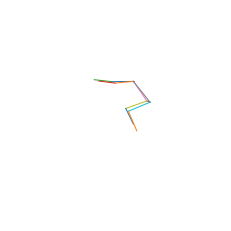

In [28]:
form_check('D:/images.jpg')